In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma, lognorm

covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
covid_cases_df=pd.DataFrame(covid_cases_data)
newjersey_data=covid_cases_df[covid_cases_df['State']=='NJ']
print("Number of rows:", newjersey_data.shape[0])
print("Number of columns:", newjersey_data.shape[1])

newjersey_data.head(22)

Number of rows: 22
Number of columns: 1269


,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
1804,0,Statewide Unallocated,NJ,34,0,0,0,0,0,0,...,1608,1608,1608,1608,1608,1608,1608,1608,1608,1608
1805,34001,Atlantic County,NJ,34,0,0,0,0,0,0,...,89852,89852,89852,89852,89852,89852,89852,89852,89852,89852
1806,34003,Bergen County,NJ,34,0,0,0,0,0,0,...,320734,320734,320734,320734,320734,320734,320734,320734,320734,320734
1807,34005,Burlington County,NJ,34,0,0,0,0,0,0,...,138798,138798,138798,138798,138798,138798,138798,138798,138798,138798
1808,34007,Camden County,NJ,34,0,0,0,0,0,0,...,166044,166044,166044,166044,166044,166044,166044,166044,166044,166044
1809,34009,Cape May County,NJ,34,0,0,0,0,0,0,...,29823,29823,29823,29823,29823,29823,29823,29823,29823,29823
1810,34011,Cumberland County,NJ,34,0,0,0,0,0,0,...,51414,51414,51414,51414,51414,51414,51414,51414,51414,51414
1811,34013,Essex County,NJ,34,0,0,0,0,0,0,...,287354,287354,287354,287354,287354,287354,287354,287354,287354,287354
1812,34015,Gloucester County,NJ,34,0,0,0,0,0,0,...,89819,89819,89819,89819,89819,89819,89819,89819,89819,89819
1813,34017,Hudson County,NJ,34,0,0,0,0,0,0,...,234993,234993,234993,234993,234993,234993,234993,234993,234993,234993


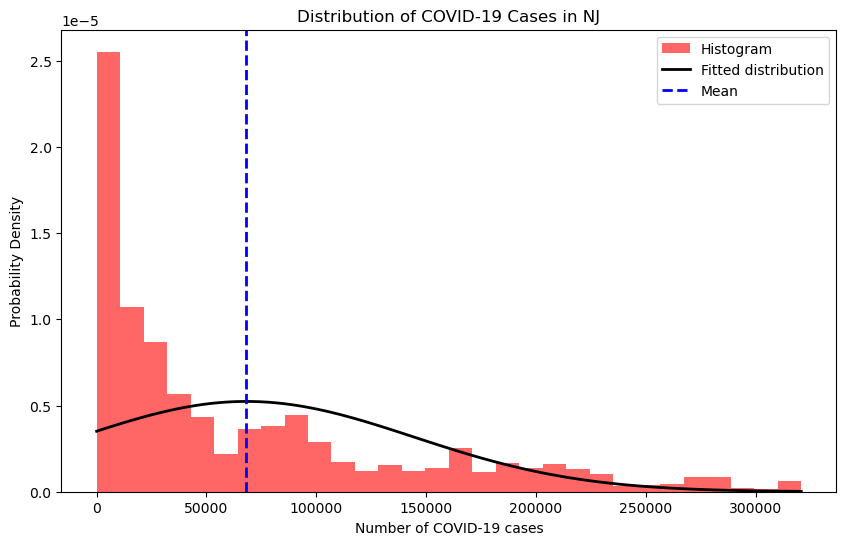

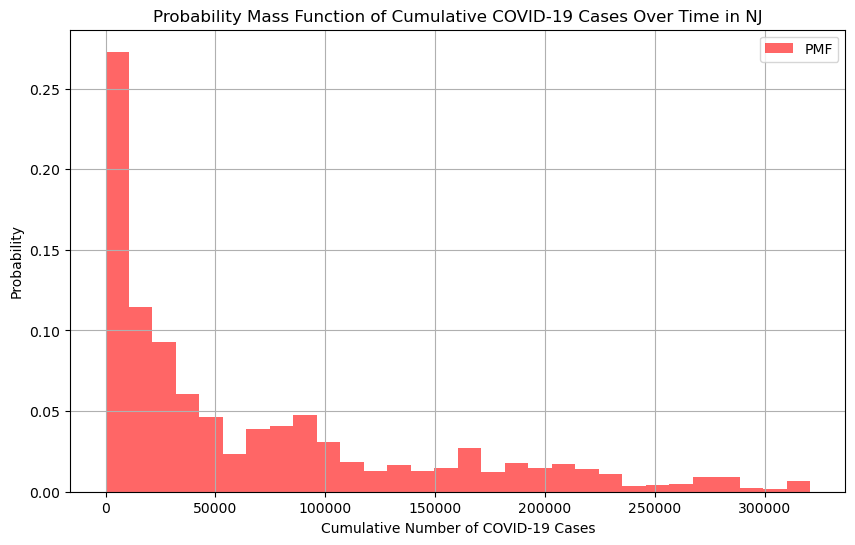

Mean: 68179.8922745239
Variance: 5802582068.19134
Skewness: 1.3004041950738874
Kurtosis: 0.8507413577975398


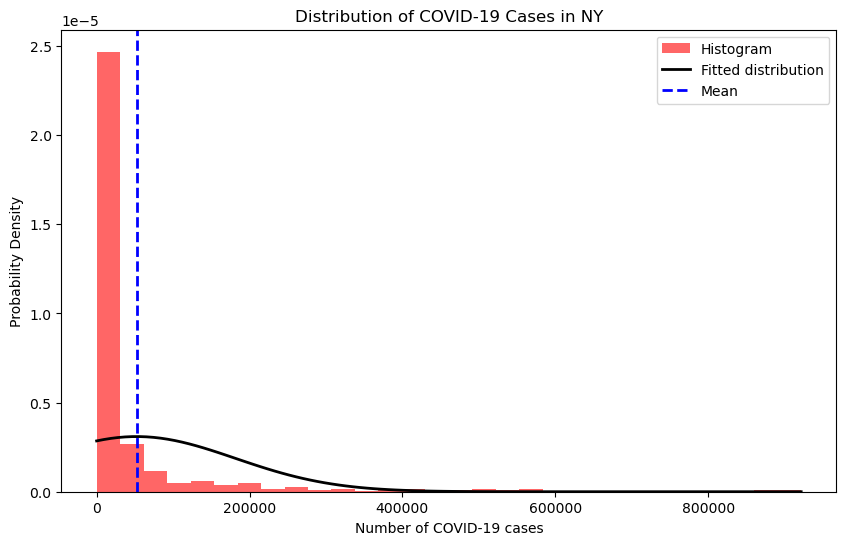

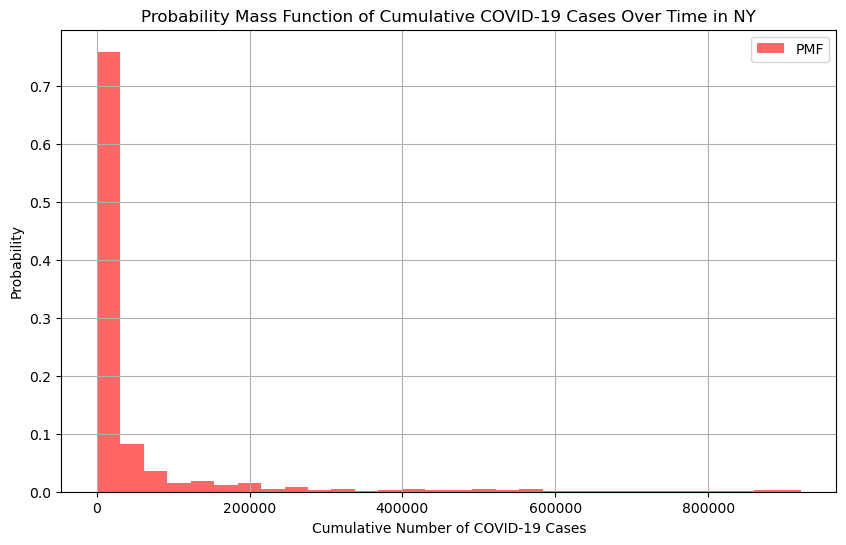

Mean: 52316.36694899303
Variance: 16614917155.712536
Skewness: 4.055979055579067
Kurtosis: 18.03388071309114


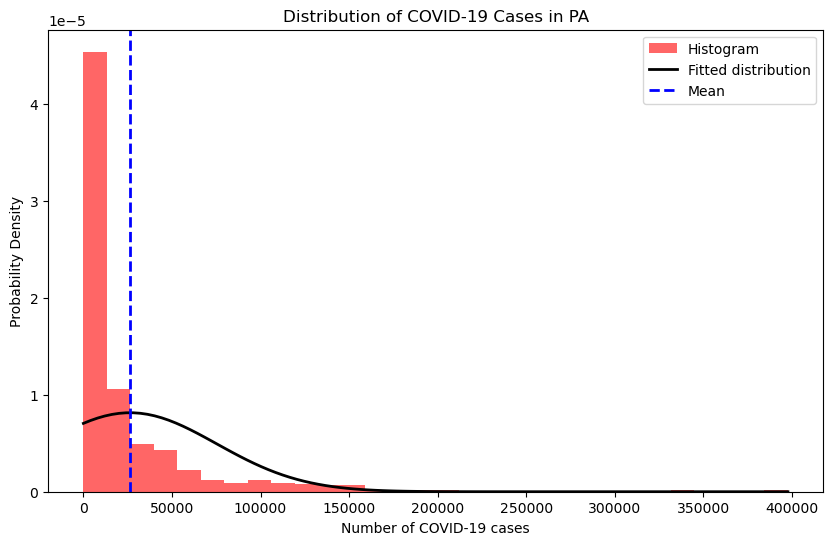

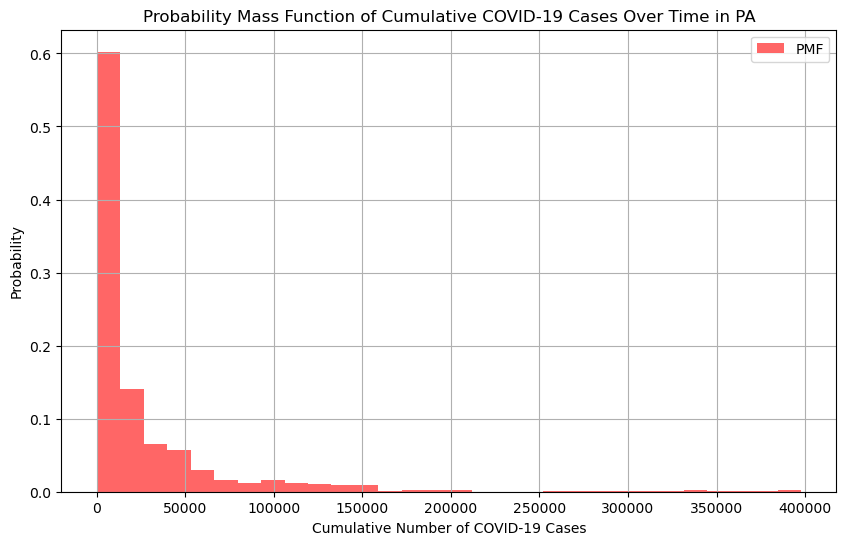

Mean: 26334.39283887468
Variance: 2391783885.541934
Skewness: 4.0007810281125975
Kurtosis: 20.60327189966241


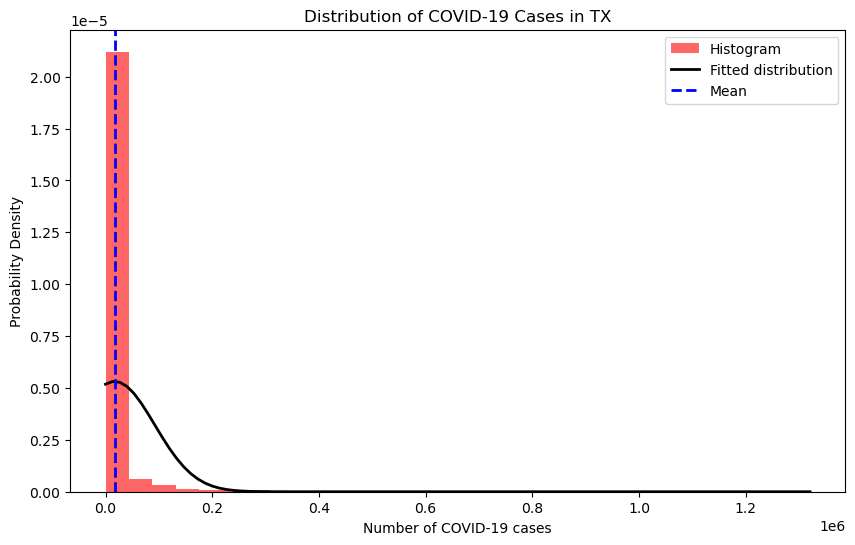

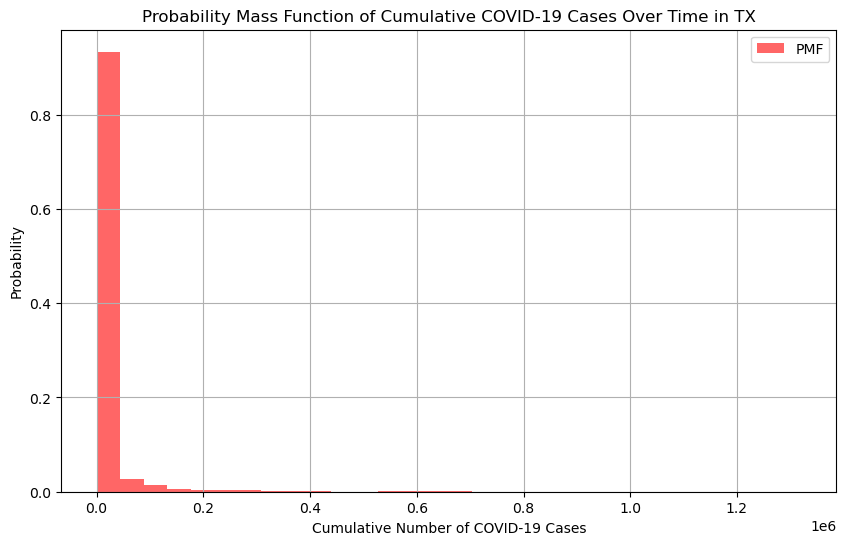

Mean: 17177.3597085949
Variance: 5626004477.294088
Skewness: 9.894635293298025
Kurtosis: 124.2173786818857


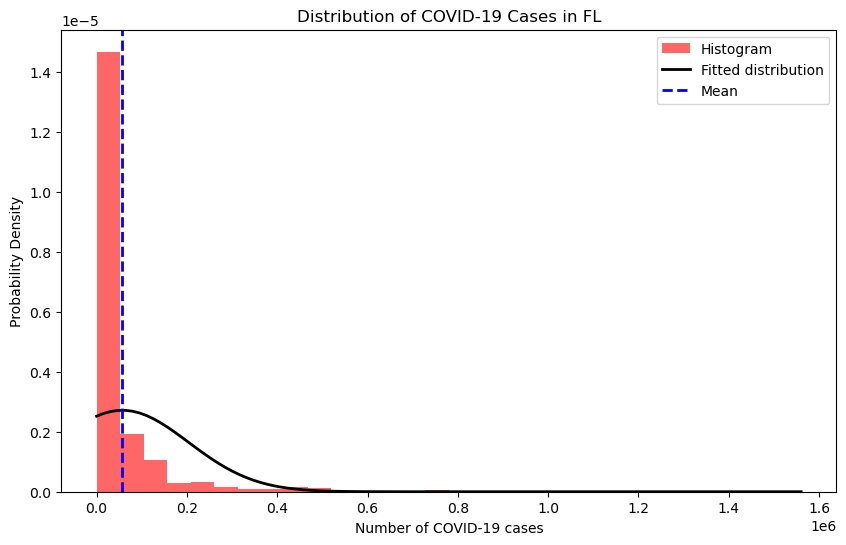

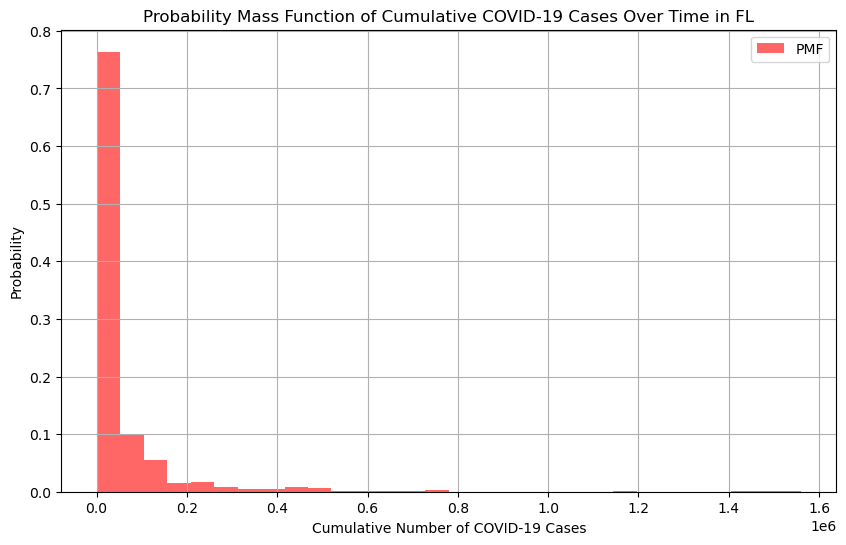

Mean: 56864.541560102305
Variance: 21539543606.641594
Skewness: 6.133121388833411
Kurtosis: 48.25202288865914


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

# Load COVID-19 cases data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")
covid_cases_df = pd.DataFrame(covid_cases_data)

# Define list of states to analyze
states = ['NJ', 'NY', 'PA', 'TX', 'FL']

# Iterate over each state
for state in states:
    # Filter data for the current state
    state_data = covid_cases_df[covid_cases_df['State'] == state]

    # Extract COVID-19 cases data
    cases = state_data.iloc[:, 4:].values.flatten()

    # Fit a distribution to the COVID-19 cases data
    fit_params = norm.fit(cases)

    # Generate data points for the fitted distribution
    x = np.linspace(min(cases), max(cases), 100)
    pdf_fitted = norm.pdf(x, *fit_params)

    # Plot histogram of the COVID-19 cases data
    plt.figure(figsize=(10, 6))
    plt.hist(cases, bins=30, density=True, alpha=0.6, color='r', label='Histogram')

    # Plot the fitted distribution
    plt.plot(x, pdf_fitted, 'k-', lw=2, label='Fitted distribution')

    # Add a vertical line at the mean of the fitted distribution
    mean_value = fit_params[0]
    plt.axvline(mean_value, color='b', linestyle='--', linewidth=2, label='Mean')

    # Add labels and legend
    plt.xlabel('Number of COVID-19 cases')
    plt.ylabel('Probability Density')
    plt.title(f'Distribution of COVID-19 Cases in {state}')
    plt.legend()

    # Show plot
    plt.show()

    # Calculate distribution statistics
    variance = fit_params[1]**2
    skewness = skew(cases)
    kurtosis_value = kurtosis(cases)

    # Calculate PMF if the data is discrete
    if len(set(cases)) < len(cases):
        hist, bins = np.histogram(cases, bins=30, density=False)
        bin_centers = (bins[1:] + bins[:-1]) / 2
        pmf = hist / np.sum(hist)

        # Plot the PMF
        plt.figure(figsize=(10, 6))
        plt.bar(bin_centers, pmf, width=np.diff(bins), color='r', alpha=0.6, label='PMF')
        plt.xlabel('Cumulative Number of COVID-19 Cases')
        plt.ylabel('Probability')
        plt.title(f'Probability Mass Function of Cumulative COVID-19 Cases Over Time in {state}')
        plt.legend()
        plt.grid(True)

        plt.show()

        print("Mean:", mean_value)
        print("Variance:", variance)
        print("Skewness:", skewness)
        print("Kurtosis:", kurtosis_value)

Comparing the distributions provides us with insight on how quickly cases increased. For example, the PMF distribution for New Jersey indicated that New Jersery experienced long amounts of time where a large amount of cases were reported, this is in contrast to the FL plot, where a low frequency of high amounts of cases were reported.

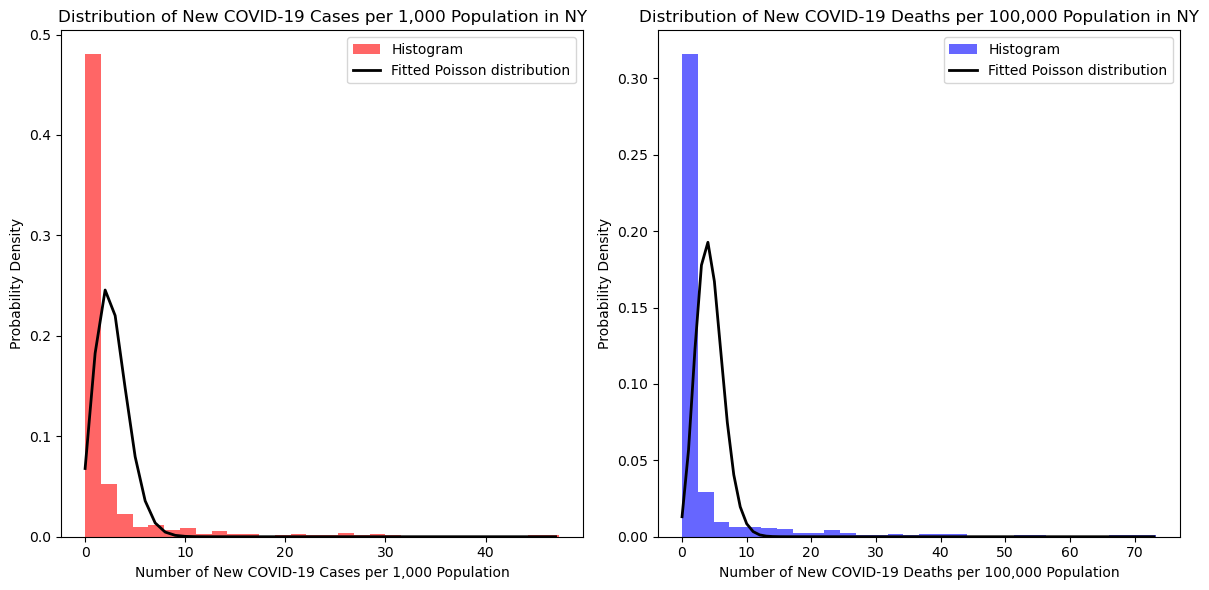

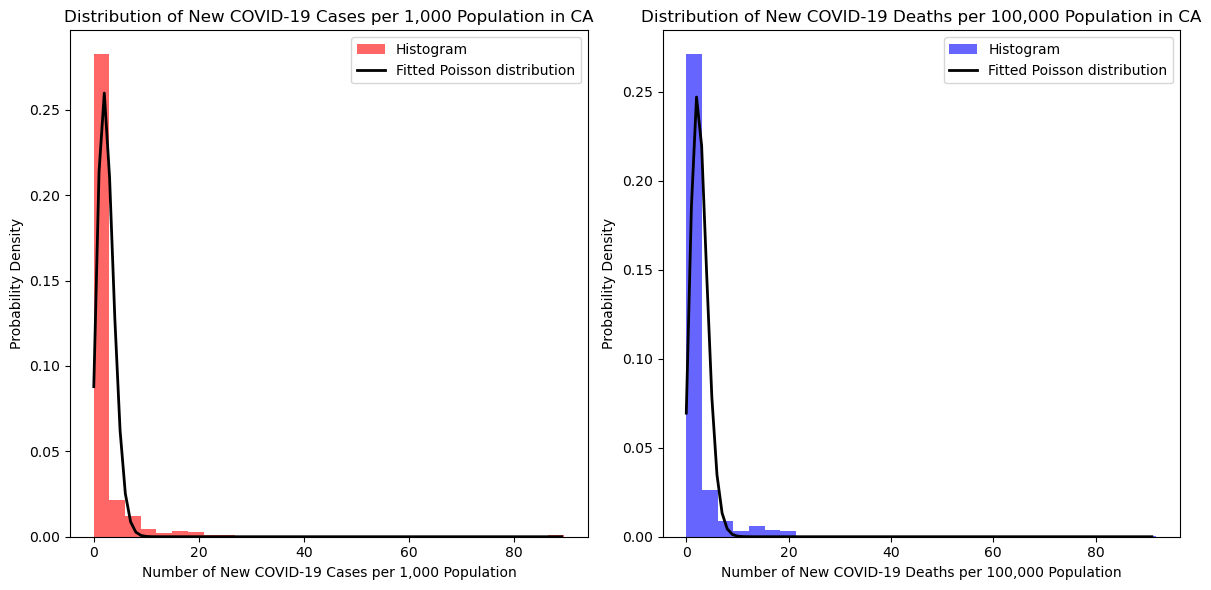

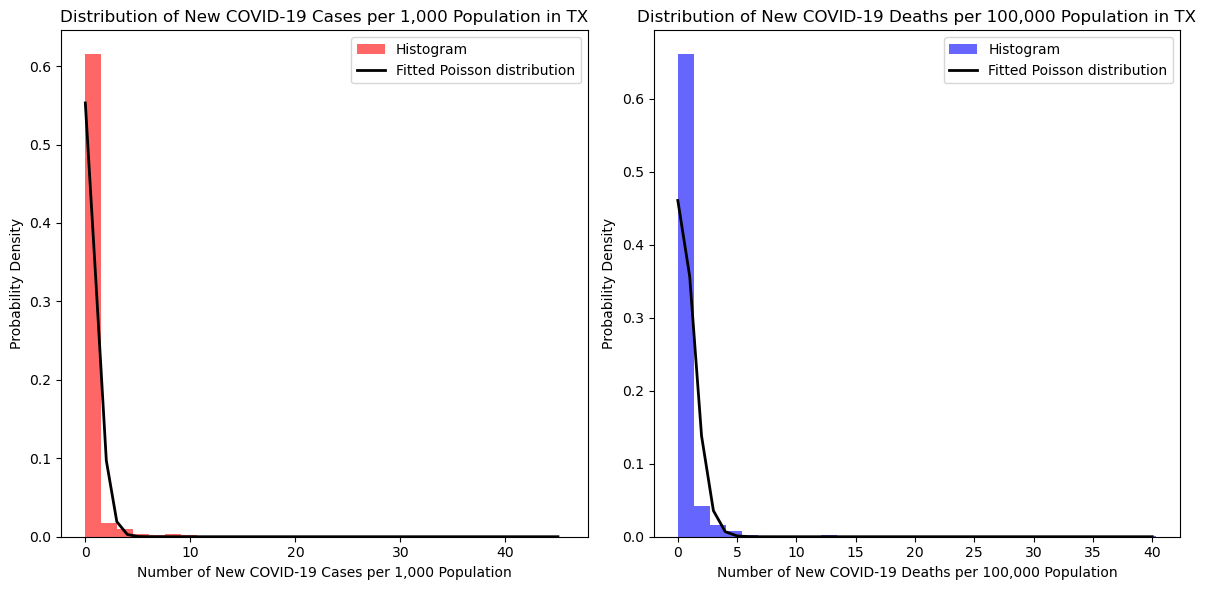

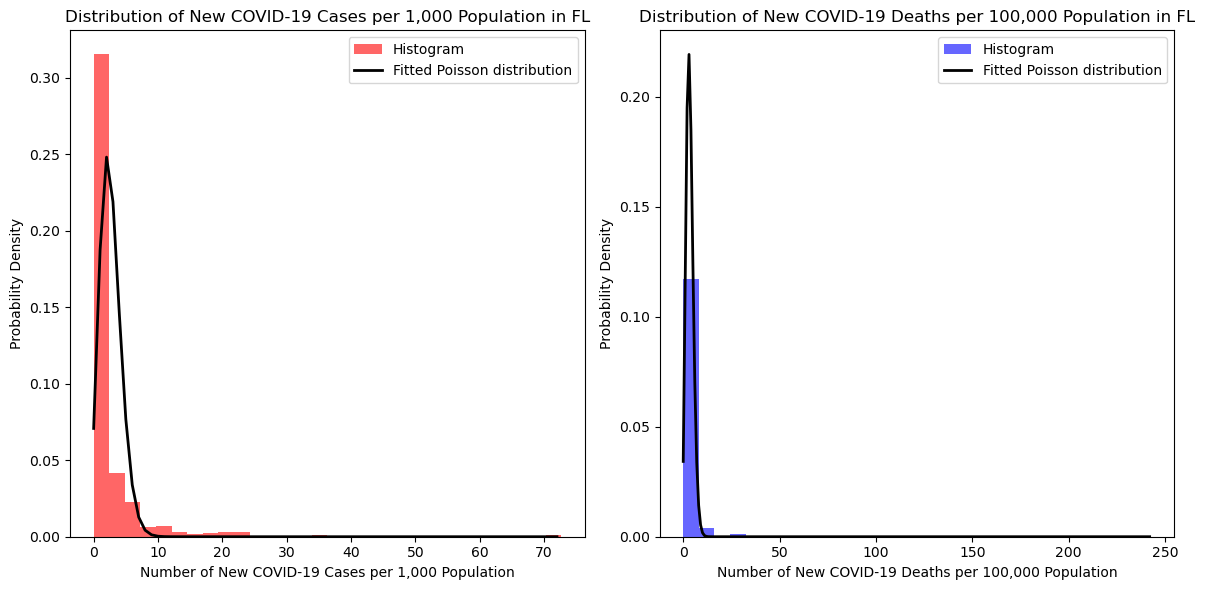

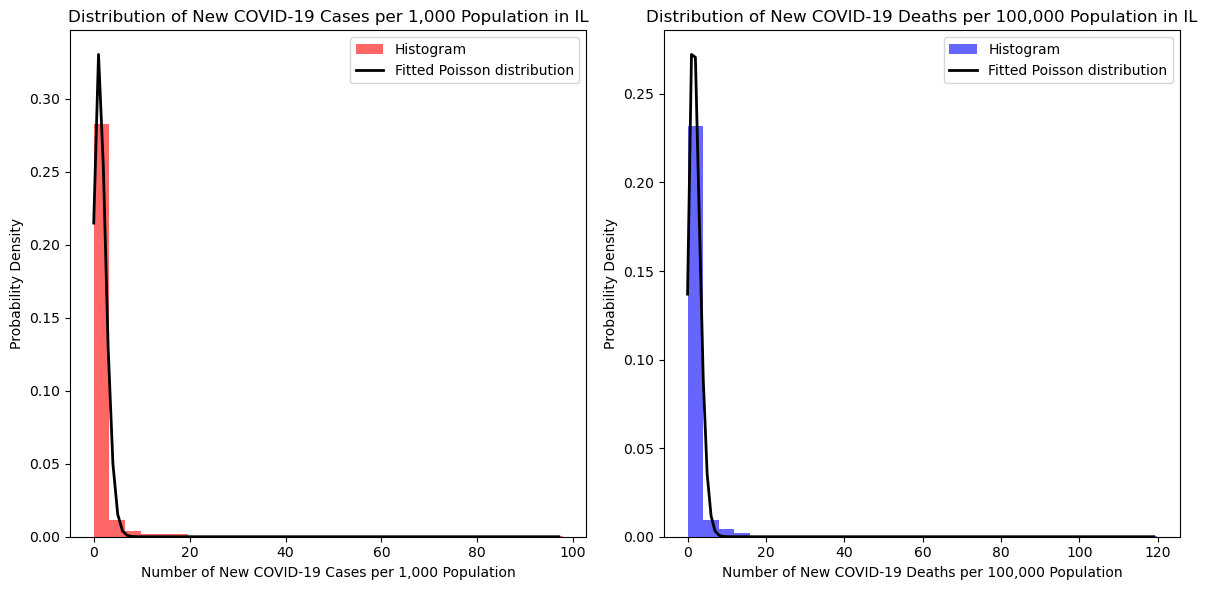

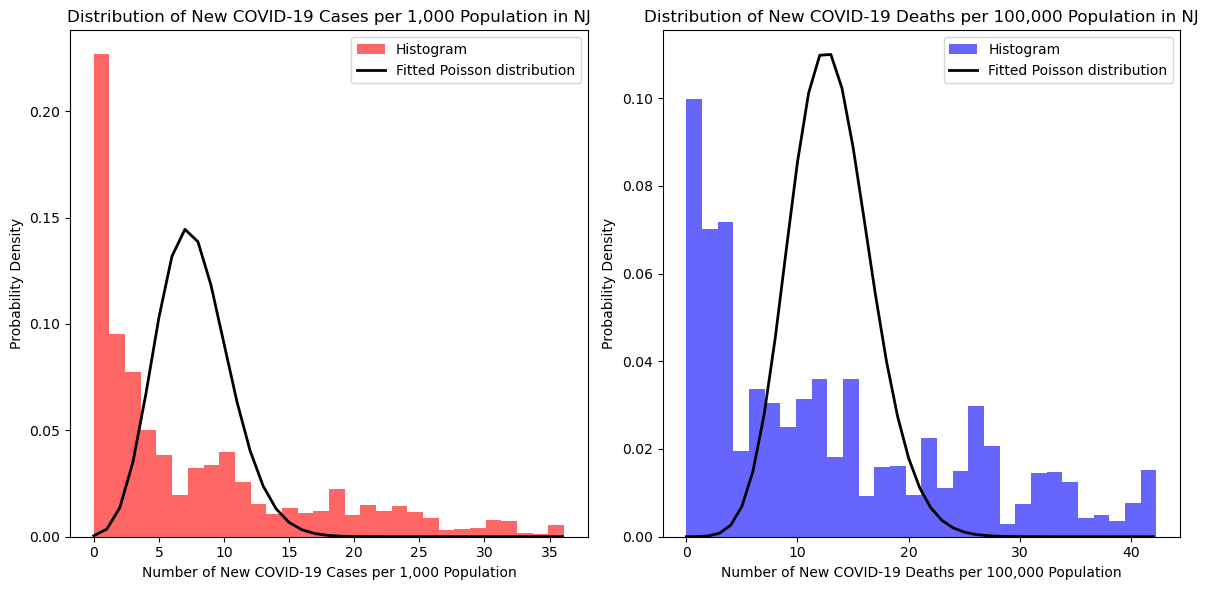

In [3]:
###########################################################################################################################
#################################################### Q2 ###################################################################
###########################################################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Load COVID-19 cases and deaths data for multiple states
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")
covid_population_data = pd.read_csv("covid_county_population_usafacts.csv")

# Define a list of states to analyze
states = ['NY', 'CA', 'TX', 'FL', 'IL', 'NJ']

# Loop through each state
for state in states:
    # Filter data for the current state
    state_cases_data = covid_cases_data[covid_cases_data['State'] == state]
    state_deaths_data = covid_deaths_data[covid_deaths_data['State'] == state]
    state_population_data = covid_population_data[covid_population_data['State'] == state]
    
    # Calculate population of the current state
    population_of_state = state_population_data['population'].sum()

    # Adjust cases and deaths to new cases and deaths per 100,000 population
    state_cases = state_cases_data.iloc[:, 4:].values.flatten()
    state_deaths = state_deaths_data.iloc[:, 4:].values.flatten()
    state_cases_per_100k = state_cases / (population_of_state / 1000)
    state_deaths_per_100k = state_deaths / (population_of_state / 100000)
    
    # Fit Poisson distributions to the adjusted COVID-19 cases and deaths data
    mean_lambda_cases = np.mean(state_cases_per_100k)
    mean_lambda_deaths = np.mean(state_deaths_per_100k)
    
    # Generate data points for the fitted Poisson distributions
    x_poisson_cases = np.arange(int(np.min(state_cases_per_100k)), int(np.max(state_cases_per_100k)) + 1)
    x_poisson_deaths = np.arange(int(np.min(state_deaths_per_100k)), int(np.max(state_deaths_per_100k)) + 1)
    pmf_poisson_cases = poisson.pmf(x_poisson_cases, mu=mean_lambda_cases)
    pmf_poisson_deaths = poisson.pmf(x_poisson_deaths, mu=mean_lambda_deaths)
    
    # Plot histograms of the adjusted COVID-19 cases and deaths data along with the fitted Poisson distributions
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(state_cases_per_100k, bins=30, density=True, alpha=0.6, color='r', label='Histogram')
    plt.plot(x_poisson_cases, pmf_poisson_cases, 'k-', lw=2, label='Fitted Poisson distribution')
    plt.xlabel('Number of New COVID-19 Cases per 1,000 Population')
    plt.ylabel('Probability Density')
    plt.title(f'Distribution of New COVID-19 Cases per 1,000 Population in {state}')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.hist(state_deaths_per_100k, bins=30, density=True, alpha=0.6, color='b', label='Histogram')
    plt.plot(x_poisson_deaths, pmf_poisson_deaths, 'k-', lw=2, label='Fitted Poisson distribution')
    plt.xlabel('Number of New COVID-19 Deaths per 100,000 Population')
    plt.ylabel('Probability Density')
    plt.title(f'Distribution of New COVID-19 Deaths per 100,000 Population in {state}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

The poisson model appears to provide a better fit for our data than a normal distribution fit

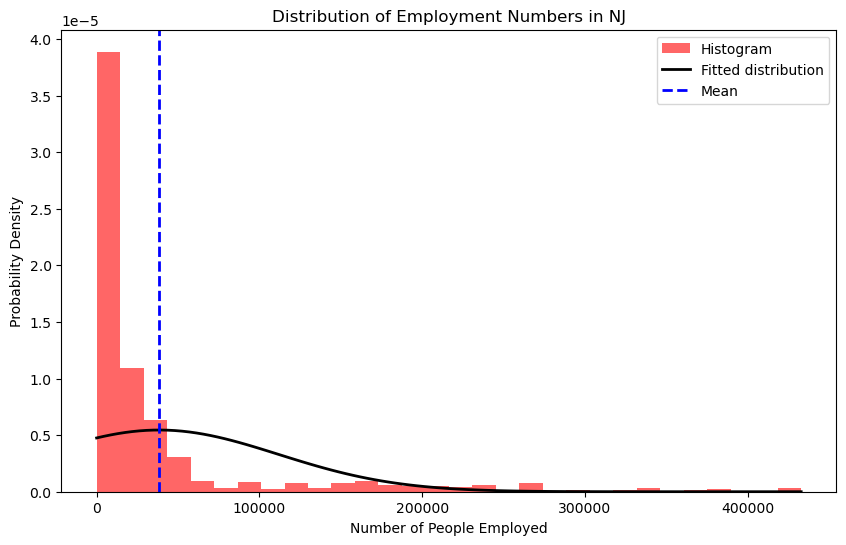

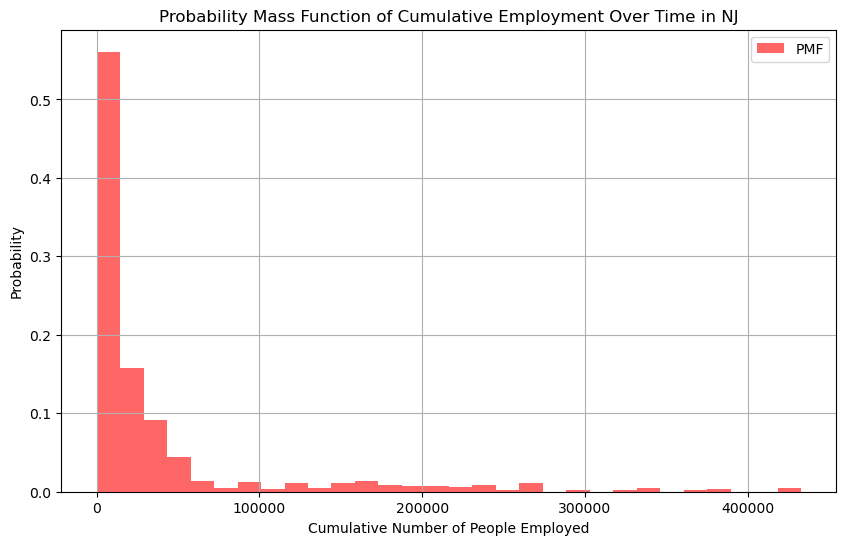

Mean: 38425.75132275133
Variance: 5356181568.375548
Skewness: 2.95512951683524
Kurtosis: 9.035733654447732


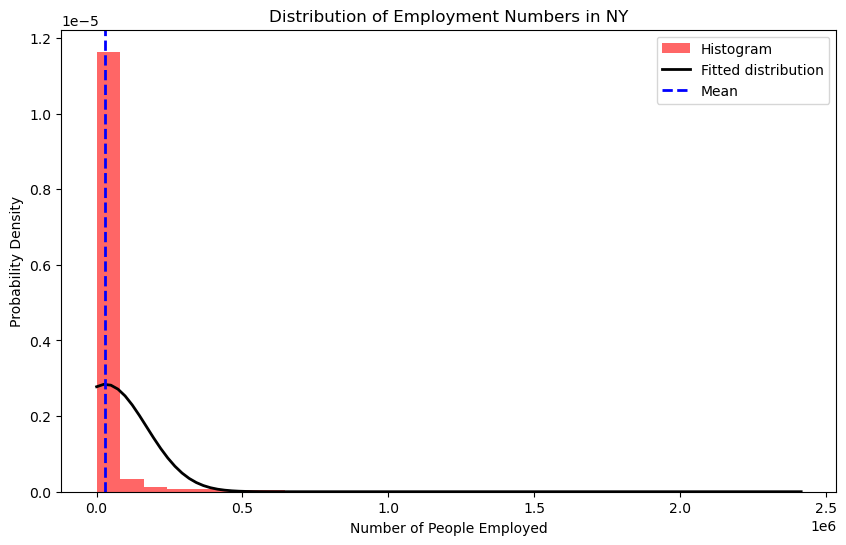

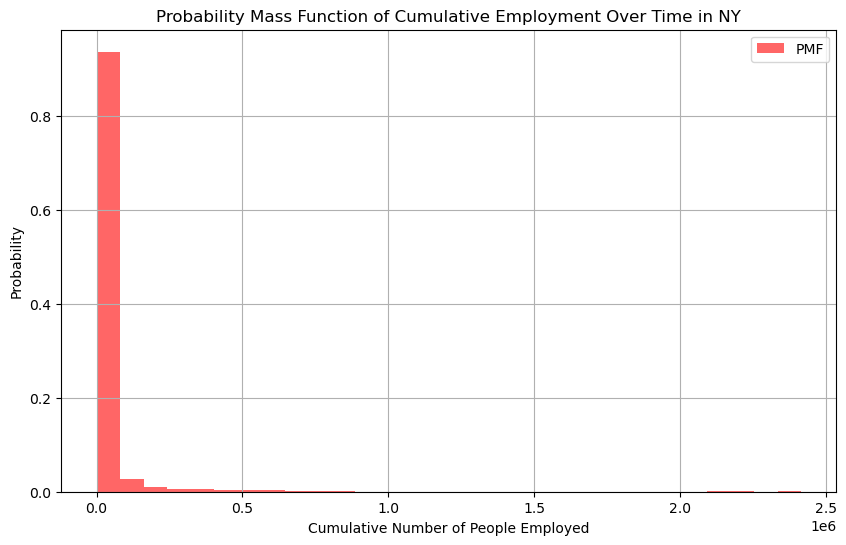

Mean: 30301.505077658305
Variance: 19700716276.031334
Skewness: 11.66951194875403
Kurtosis: 169.36912828036057


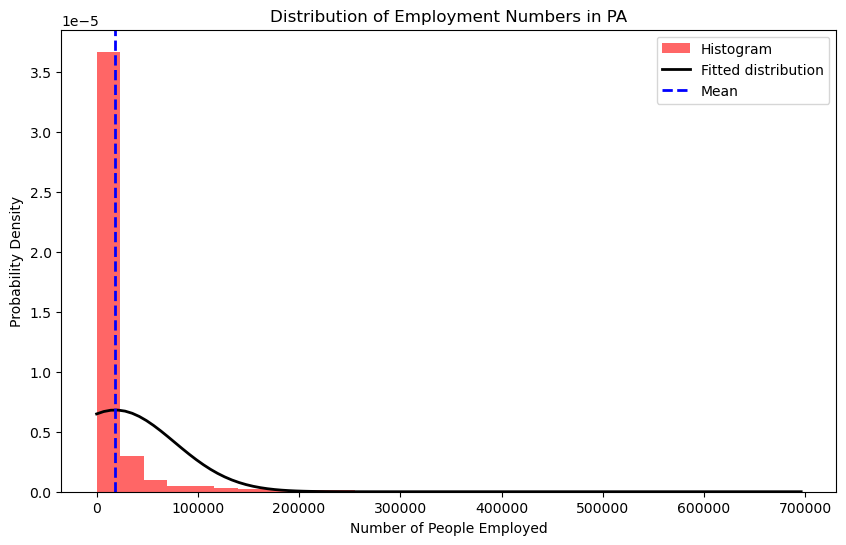

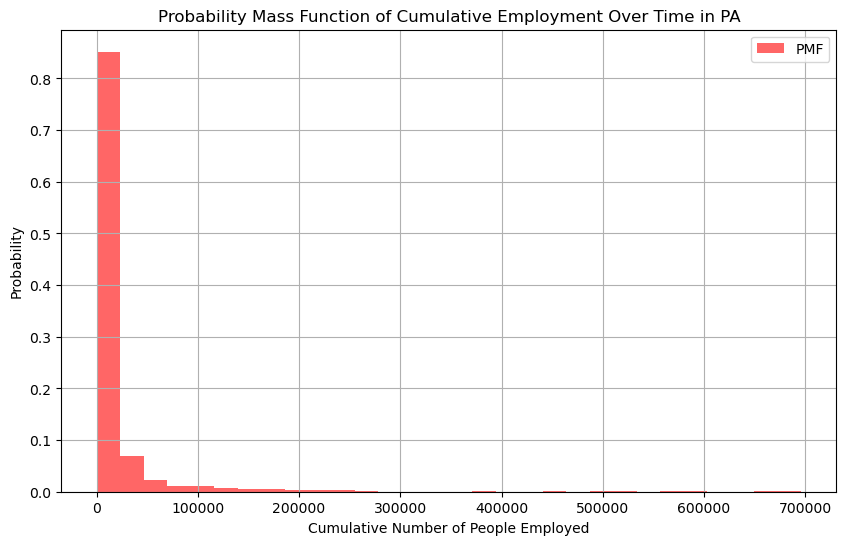

Mean: 18371.59174714662
Variance: 3424122476.8842516
Skewness: 7.179038498425554
Kurtosis: 62.620506515812025


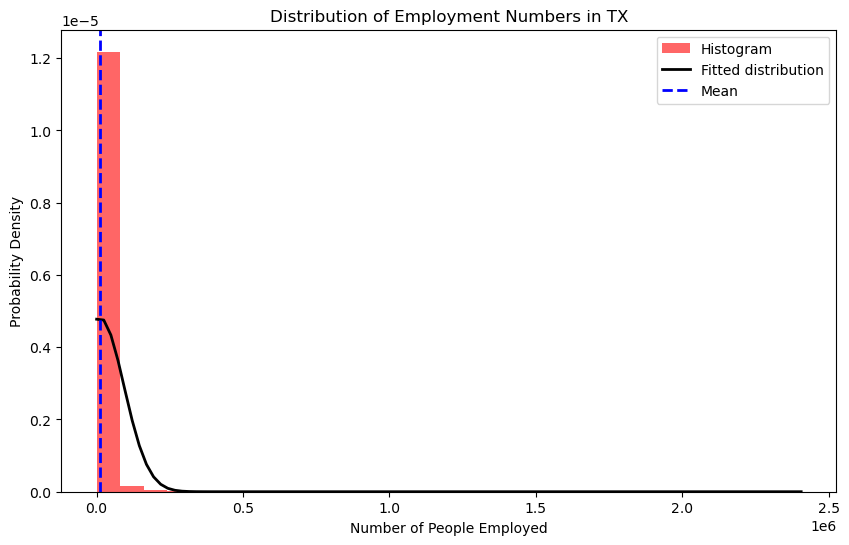

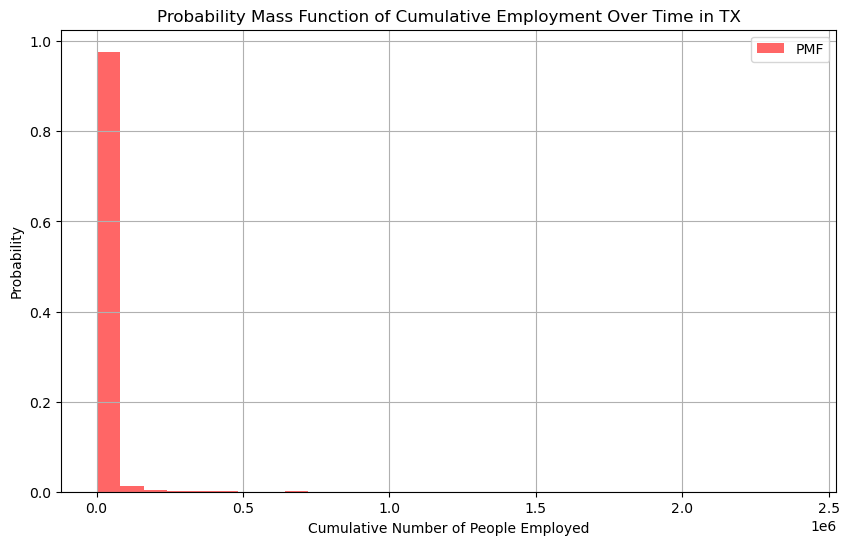

Mean: 10761.405891126025
Variance: 6862721340.53361
Skewness: 18.4000213059592
Kurtosis: 409.0422687127189


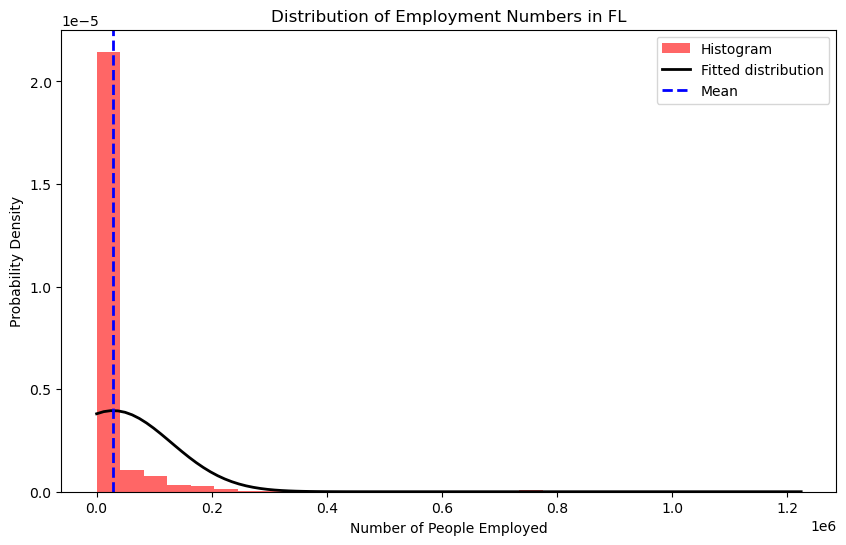

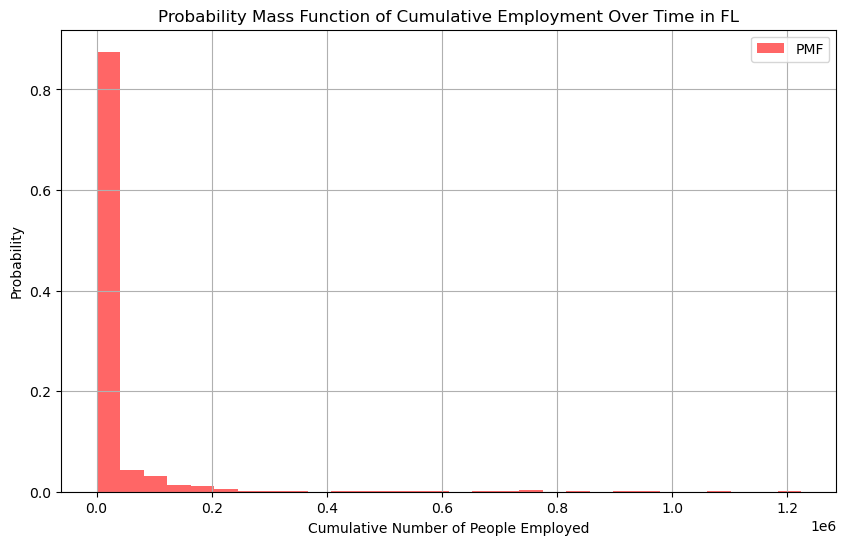

Mean: 28580.16528468767
Variance: 10175807088.146807
Skewness: 6.989541732129556
Kurtosis: 57.03014055388159


In [4]:
###########################################################################################################################
#################################################### Q3 ###################################################################
###########################################################################################################################
# EMPLOYMENT NUMBERS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

dtype = {'Area\nCode' : str, 'St' : str, 'Own' : int, 'NAICS' : int, 'Year' : int, 'Qtr': int, 'Area Type' : str, 'St Name' : str, 'Area' : str, 'Ownership' : str, 'Industry' : str, 'Status Code' : str, 'Establishment Count' : int, 'January Employment' : int, 'February Employment' : int, 'March Employment' : int, 'Total Quarterly Wage' : int, 'Average Weekly Wage' : int, 'Employment Location Quotient Relative to U.S.' : float, 'Total Wage Location Quotient Relative to U.S.' : float}

super_covid = pd.read_csv('super_covid_data.csv')
enrichment = pd.read_csv('enrichment.csv', dtype = dtype)

super_covid['countyFIPS'] = super_covid['countyFIPS'].astype(str)

super_covid_df = pd.merge(enrichment, super_covid, left_on='Area\nCode', right_on='countyFIPS', how='inner')

states = ['NJ', 'NY', 'PA', 'TX', 'FL']

for state in states:
    state_data = super_covid_df[super_covid_df['State'] == state]
    employment = state_data.iloc[:, 14:17].values.flatten()

    # Fit a distribution to the COVID-19 cases data
    fit_params = norm.fit(employment)

    # Generate data points for the fitted distribution
    x = np.linspace(min(employment), max(employment), 100)
    pdf_fitted = norm.pdf(x, *fit_params)

    # Plot histogram of the COVID-19 cases data
    plt.figure(figsize=(10, 6))
    plt.hist(employment, bins=30, density=True, alpha=0.6, color='r', label='Histogram')

    # Plot the fitted distribution
    plt.plot(x, pdf_fitted, 'k-', lw=2, label='Fitted distribution')

    # Add a vertical line at the mean of the fitted distribution
    mean_value = fit_params[0]
    plt.axvline(mean_value, color='b', linestyle='--', linewidth=2, label='Mean')

    # Add labels and legend
    plt.xlabel('Number of People Employed')
    plt.ylabel('Probability Density')
    plt.title(f'Distribution of Employment Numbers in {state}')
    plt.legend()

    # Show plot
    plt.show()

    # Calculate distribution statistics
    variance = fit_params[1] ** 2
    skewness = skew(employment)
    kurtosis_value = kurtosis(employment)

    # Calculate PMF if the data is discrete
    if len(set(employment)) < len(employment):
        hist, bins = np.histogram(employment, bins=30, density=False)
        bin_centers = (bins[1:] + bins[:-1]) / 2
        pmf = hist / np.sum(hist)

        # Plot the PMF
        plt.figure(figsize=(10, 6))
        plt.bar(bin_centers, pmf, width=np.diff(bins), color='r', alpha=0.6, label='PMF')
        plt.xlabel('Cumulative Number of People Employed')
        plt.ylabel('Probability')
        plt.title(f'Probability Mass Function of Cumulative Employment Over Time in {state}')
        plt.legend()
        plt.grid(True)

        plt.show()

    print("Mean:", mean_value)
    print("Variance:", variance)
    print("Skewness:", skewness)
    print("Kurtosis:", kurtosis_value)

To observe the effects of employmeny on covid cases, I calculated the value of ((state population) / (mean number of COVID-19 cases)) / ((state population) / (mean number of people employed)) for each state. This comparison depicts the prevalence of COVID-19 cases relative to the employed population within a state. This ratio provides insights into the relationship between the spread of the virus and the workforce. The results were as follows:
NJ: ~0.56,
NY: ~0.57,
PA: ~0.70,
TX: ~0.63,
FL: ~0.50.
This feedback would suggest that Pennsylvania experienced a higher prevalence of COVID-19 cases relative to the employed population compared to other states.

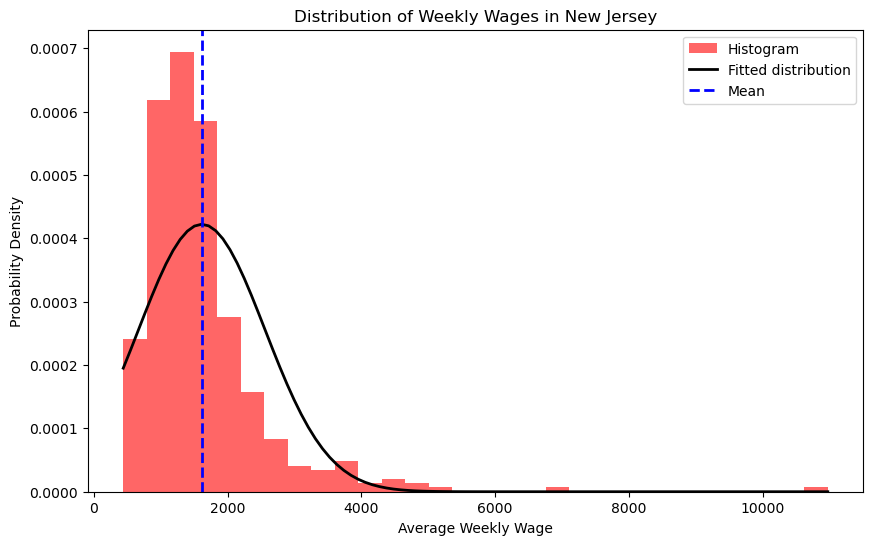

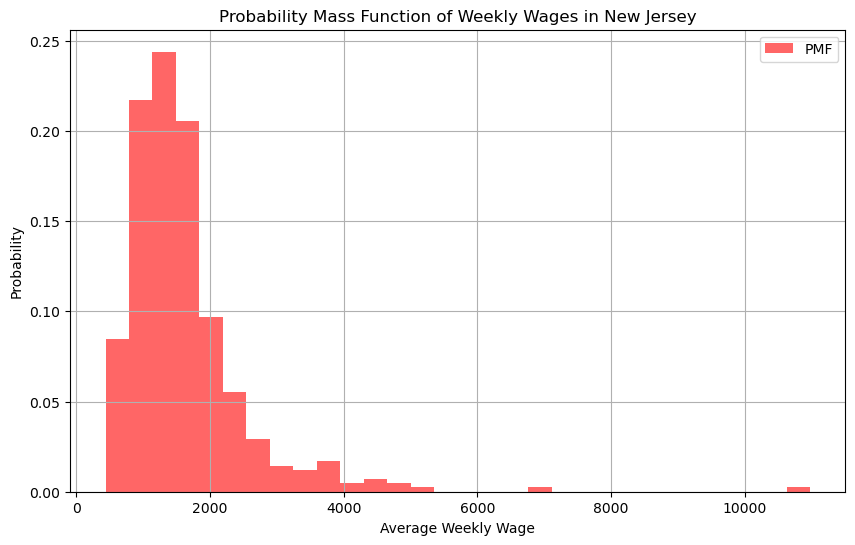

Mean: 1611.463768115942
Variance: 893144.9781558496
Skewness: 3.689734434481651
Kurtosis: 25.992703781470194


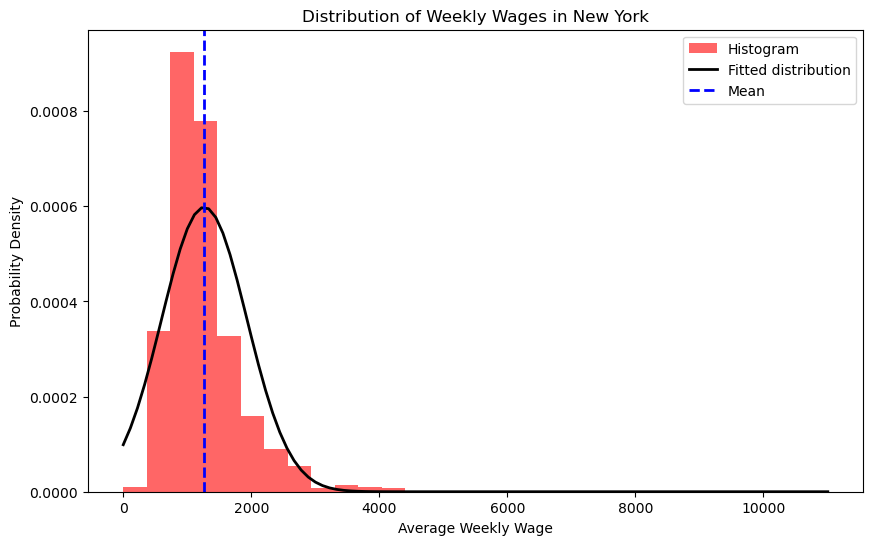

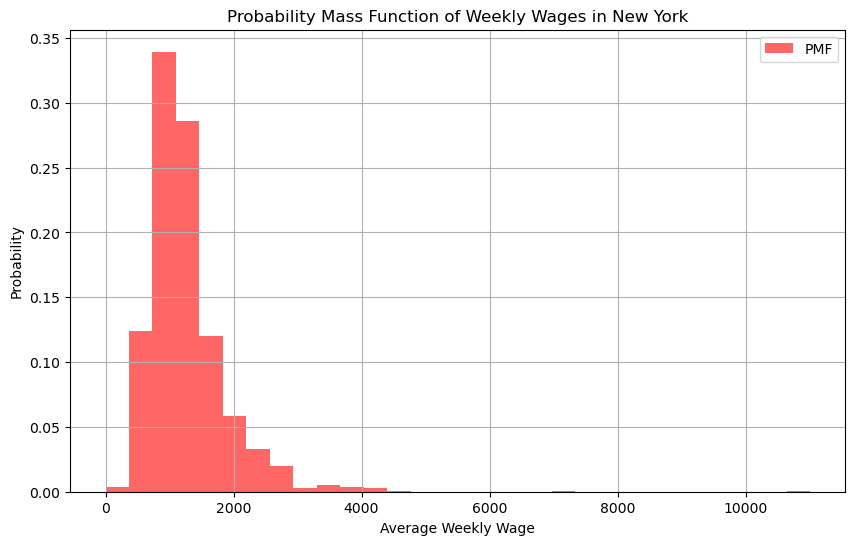

Mean: 1265.7317708333333
Variance: 444925.682393392
Skewness: 4.376198654904833
Kurtosis: 46.275213269344086


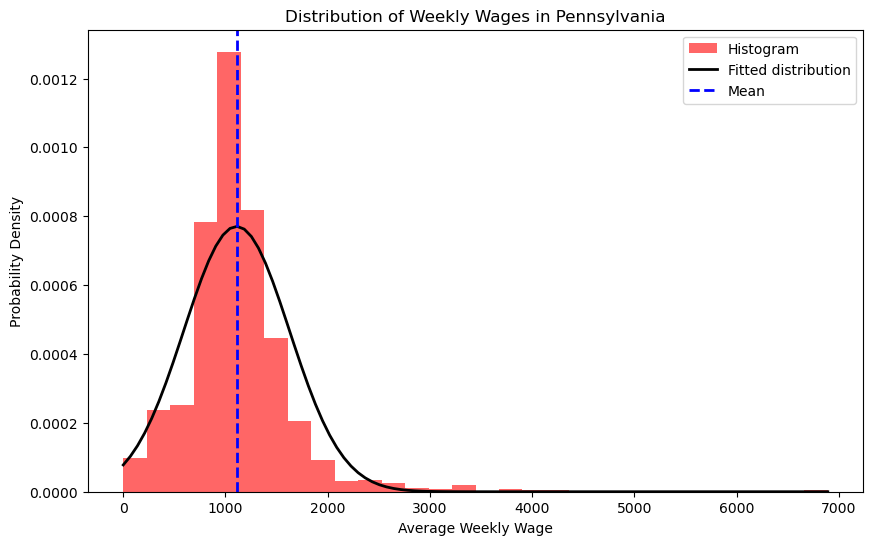

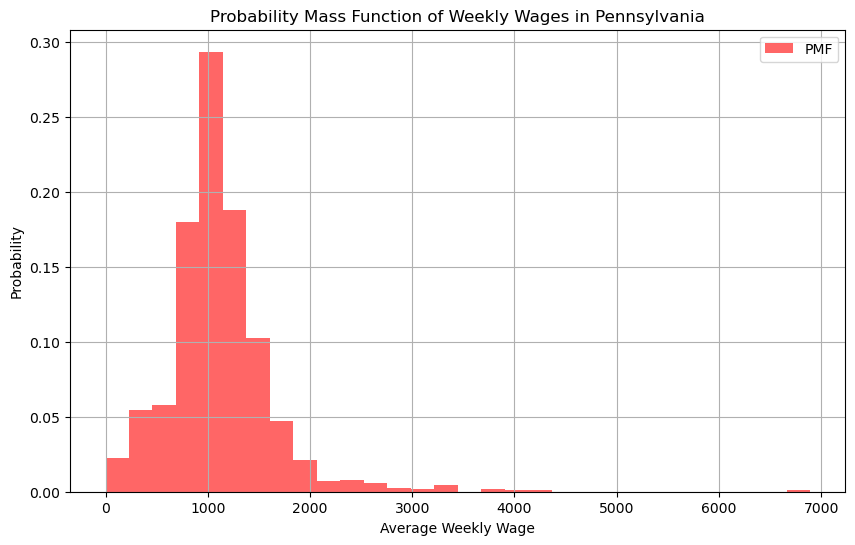

Mean: 1108.5861774744028
Variance: 267995.98660074663
Skewness: 2.362084907638992
Kurtosis: 17.529098776053672


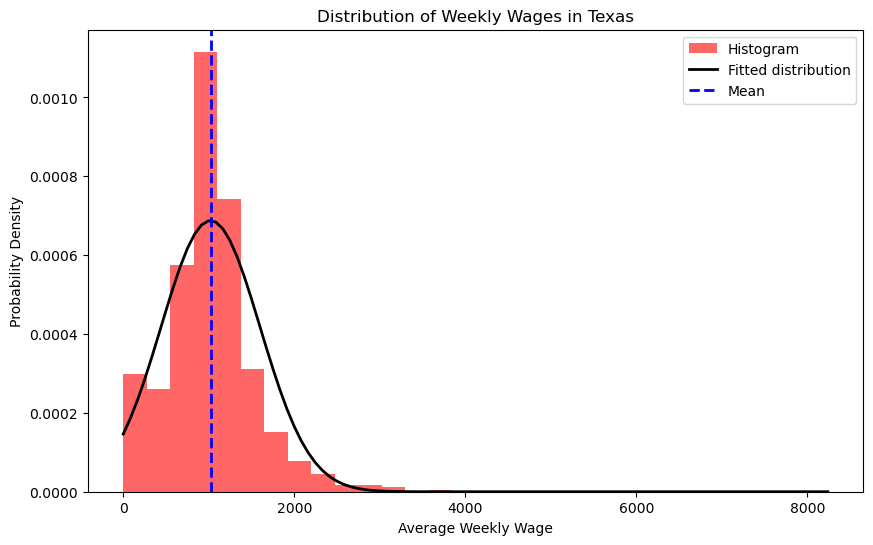

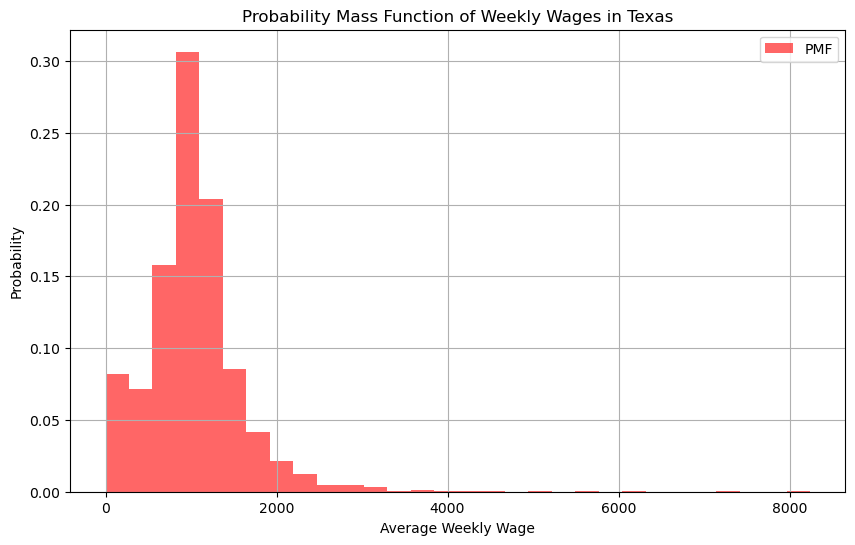

Mean: 1020.5652463382157
Variance: 336362.4796532571
Skewness: 1.8750553675156048
Kurtosis: 14.09499945333064


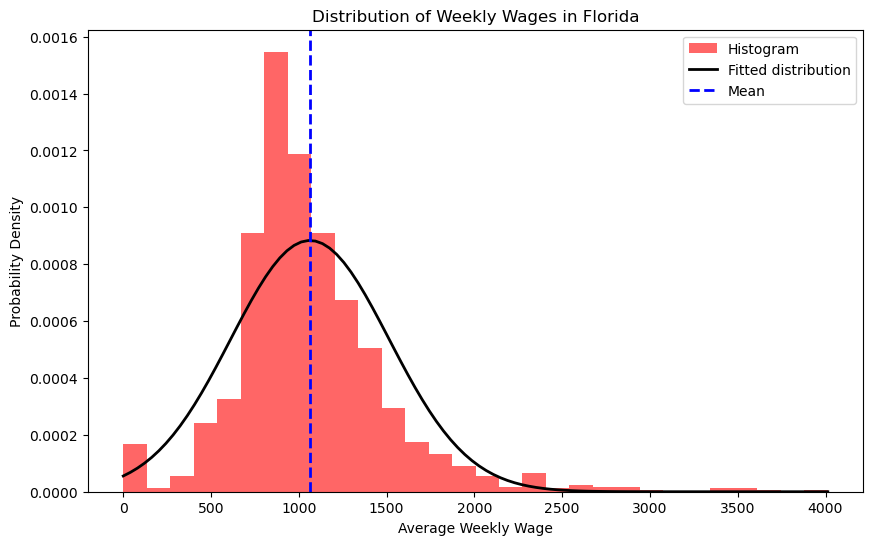

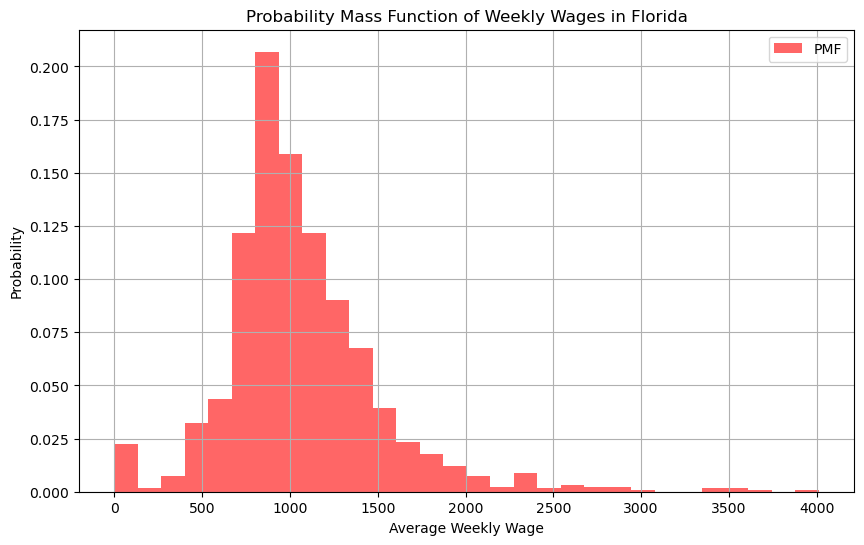

Mean: 1063.0354267310788
Variance: 203953.11146636377
Skewness: 1.4837297032991732
Kurtosis: 6.029121935096885


In [23]:
###########################################################################################################################
#################################################### Q4 ###################################################################
###########################################################################################################################
# WEEKLY WAGE CORRELATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

# Load COVID-19 cases data
enrichment = pd.read_csv('enrichment.csv', dtype = dtype)
enrichment_df = pd.DataFrame(enrichment)

# Define list of states to analyze
states = ['New Jersey', 'New York', 'Pennsylvania', 'Texas', 'Florida']

# Iterate over each state
for state in states:
    # Filter data for the current state
    state_data = enrichment_df[enrichment_df['St Name'] == state]

    # Extract COVID-19 cases data
    avg_weekly_wage_index = state_data.iloc[:, 18].values.flatten()

    # Fit a distribution to the COVID-19 cases data
    fit_params = norm.fit(avg_weekly_wage_index)

    # Generate data points for the fitted distribution
    x = np.linspace(min(avg_weekly_wage_index), max(avg_weekly_wage_index), 100)
    pdf_fitted = norm.pdf(x, *fit_params)

    # Plot histogram of the COVID-19 cases data
    plt.figure(figsize=(10, 6))
    plt.hist(avg_weekly_wage_index, bins=30, density=True, alpha=0.6, color='r', label='Histogram')

    # Plot the fitted distribution
    plt.plot(x, pdf_fitted, 'k-', lw=2, label='Fitted distribution')

    # Add a vertical line at the mean of the fitted distribution
    mean_value = fit_params[0]
    plt.axvline(mean_value, color='b', linestyle='--', linewidth=2, label='Mean')

    # Add labels and legend
    plt.xlabel('Average Weekly Wage')
    plt.ylabel('Probability Density')
    plt.title(f'Distribution of Weekly Wages in {state}')
    plt.legend()

    # Show plot
    plt.show()

    # Calculate distribution statistics
    variance = fit_params[1]**2
    skewness = skew(avg_weekly_wage_index)
    kurtosis_value = kurtosis(avg_weekly_wage_index)

    # Calculate PMF if the data is discrete
    if len(set(avg_weekly_wage_index)) < len(avg_weekly_wage_index):
        hist, bins = np.histogram(avg_weekly_wage_index, bins=30, density=False)
        bin_centers = (bins[1:] + bins[:-1]) / 2
        pmf = hist / np.sum(hist)

        # Plot the PMF
        plt.figure(figsize=(10, 6))
        plt.bar(bin_centers, pmf, width=np.diff(bins), color='r', alpha=0.6, label='PMF')
        plt.xlabel('Average Weekly Wage')
        plt.ylabel('Probability')
        plt.title(f'Probability Mass Function of Weekly Wages in {state}')
        plt.legend()
        plt.grid(True)

        plt.show()

        print("Mean:", mean_value)
        print("Variance:", variance)
        print("Skewness:", skewness)
        print("Kurtosis:", kurtosis_value)

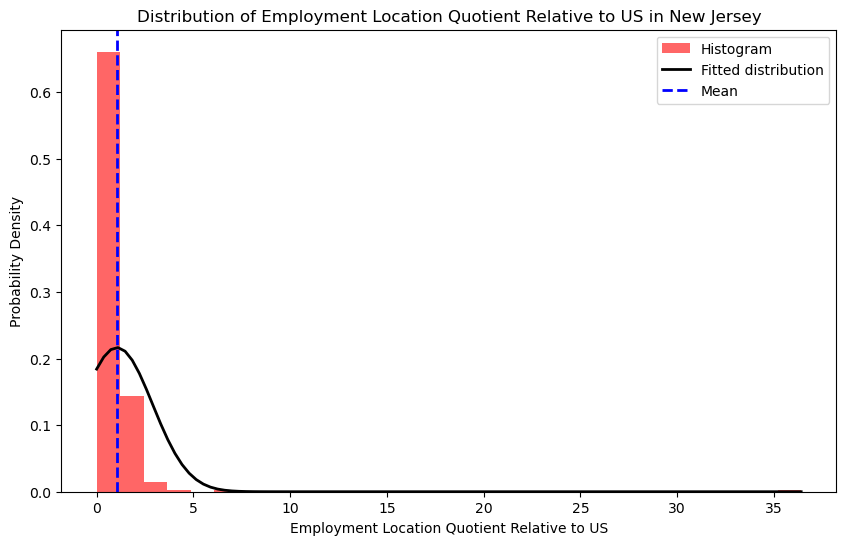

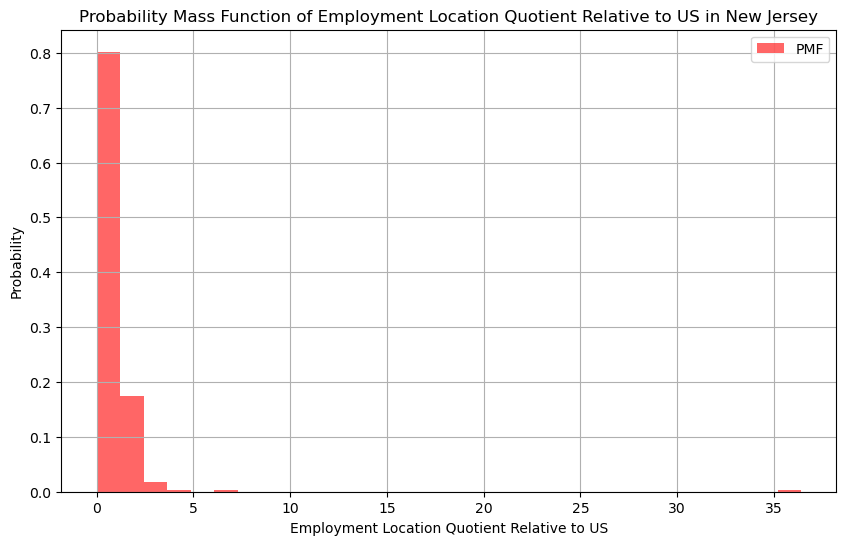

Mean: 1.048864734299517
Variance: 3.3928018512684077
Skewness: 17.190964809035172
Kurtosis: 325.38384100781633


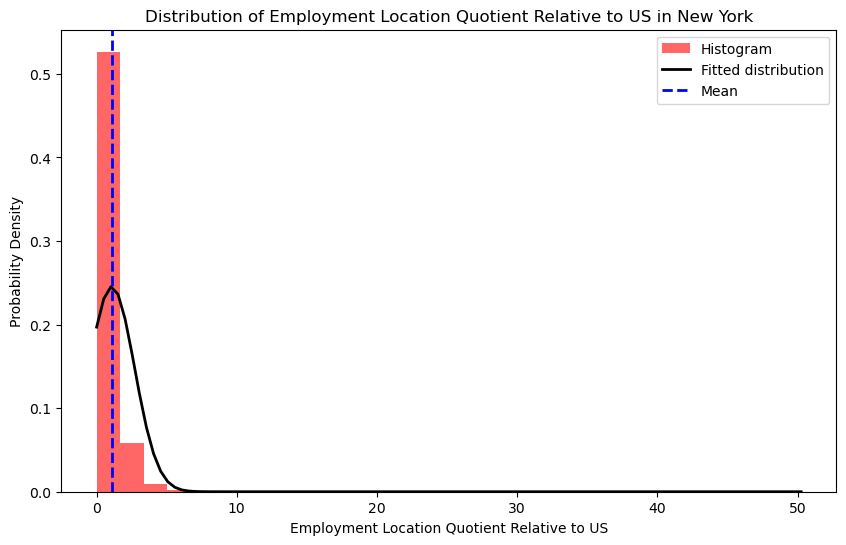

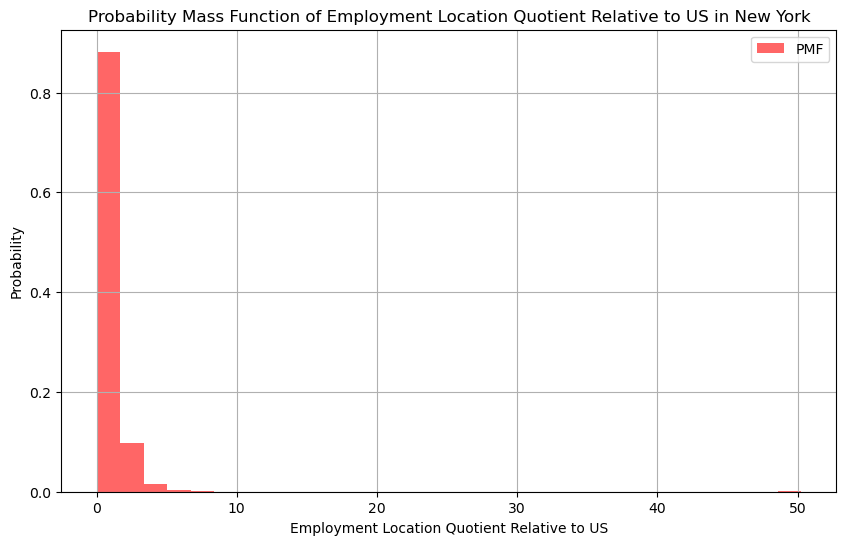

Mean: 1.0776128472222224
Variance: 2.643875638307171
Skewness: 24.26571464539779
Kurtosis: 724.2490013377789


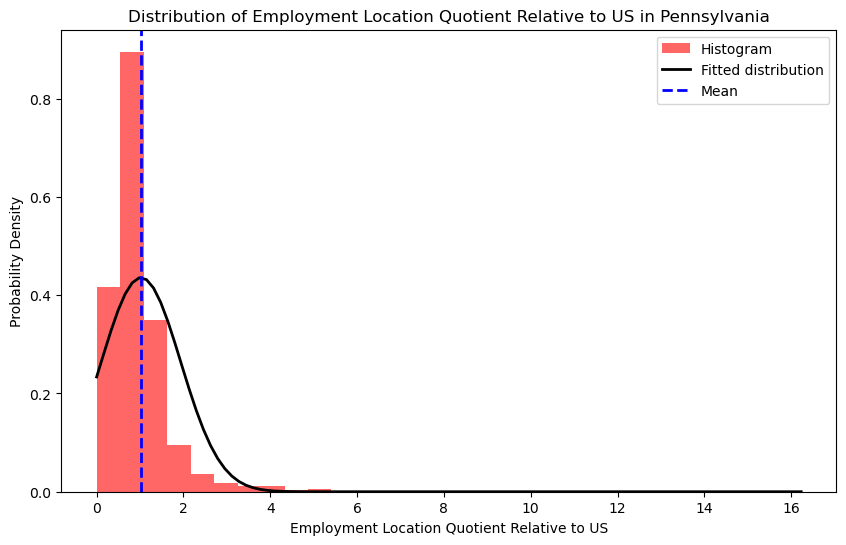

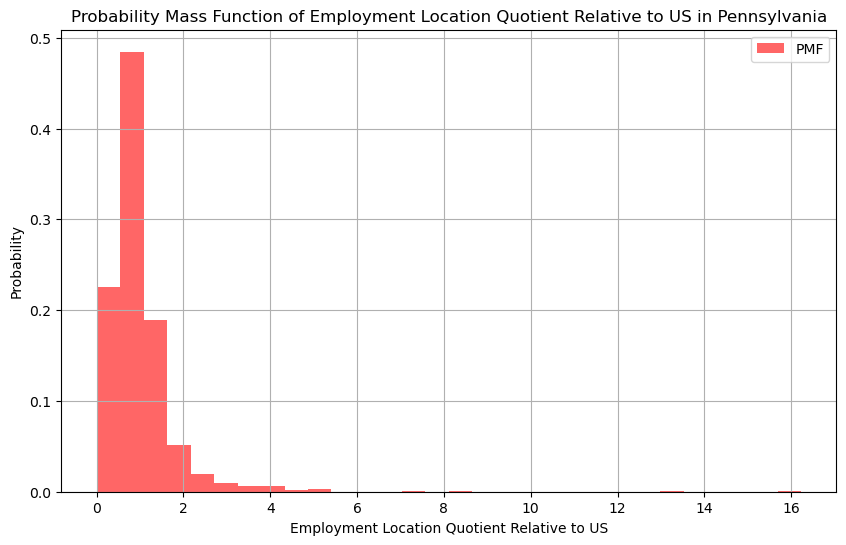

Mean: 1.0218856655290103
Variance: 0.8372970415351374
Skewness: 7.446422317485281
Kurtosis: 97.40663806853522


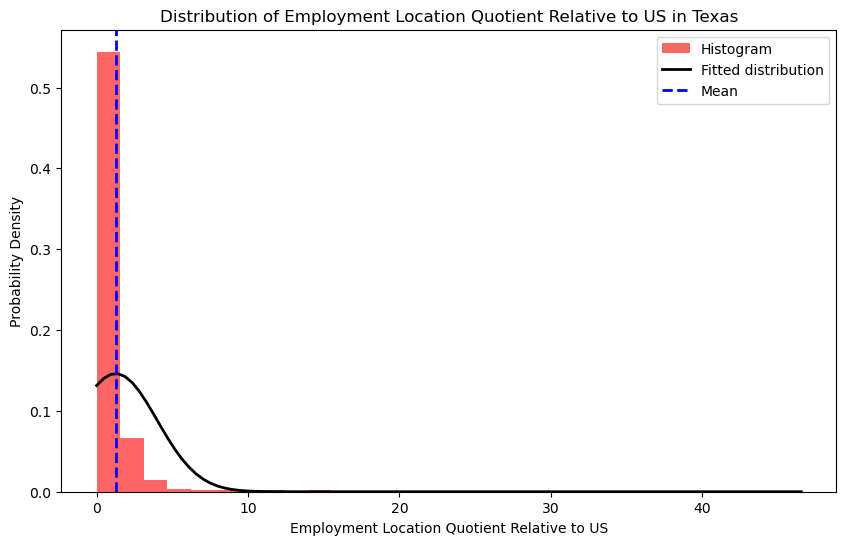

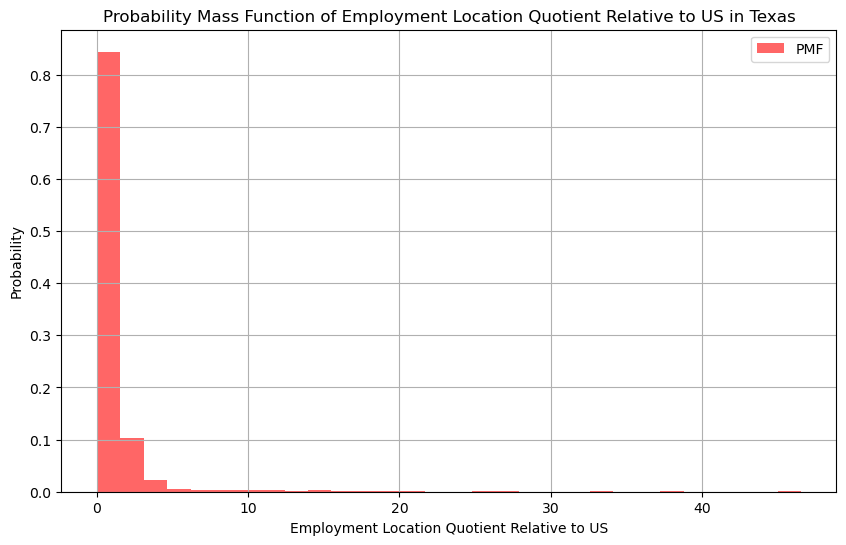

Mean: 1.2609764758100312
Variance: 7.4492716164017825
Skewness: 8.536222454975231
Kurtosis: 95.13366547109186


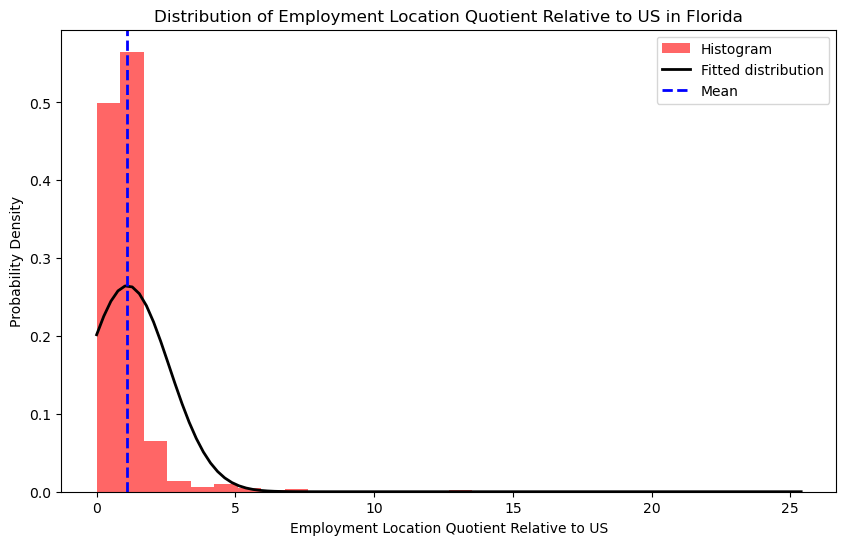

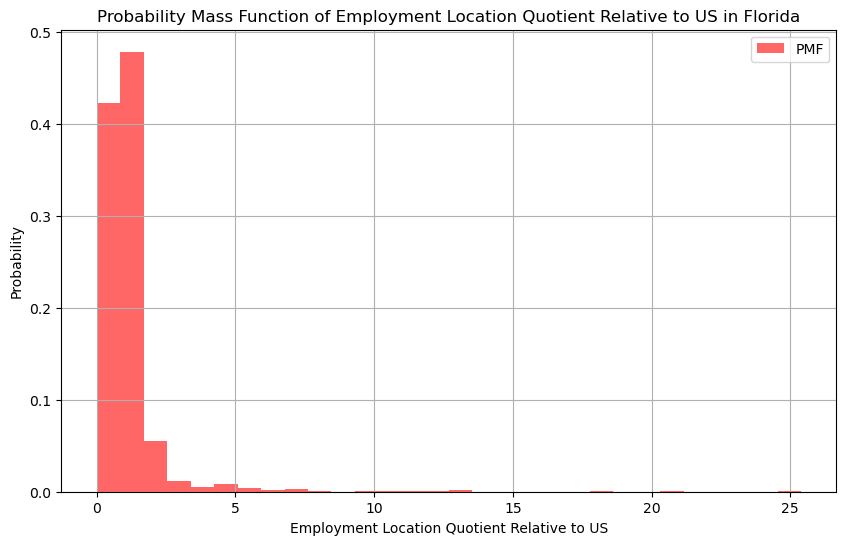

Mean: 1.1122302737520129
Variance: 2.271212175637445
Skewness: 8.499526305840515
Kurtosis: 99.96140586731086


In [22]:
###########################################################################################################################
#################################################### Q4 ###################################################################
###########################################################################################################################
# EMPLOYMENT LOCATION QUOTIENT RELATIVE TO US CORRELATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

# Load COVID-19 cases data
enrichment = pd.read_csv('enrichment.csv', dtype = dtype)
enrichment_df = pd.DataFrame(enrichment)

# Define list of states to analyze
states = ['New Jersey', 'New York', 'Pennsylvania', 'Texas', 'Florida']

# Iterate over each state
for state in states:
    # Filter data for the current state
    state_data = enrichment_df[enrichment_df['St Name'] == state]

    # Extract COVID-19 cases data
    avg_weekly_wage_index = state_data.iloc[:, 19].values.flatten()

    # Fit a distribution to the COVID-19 cases data
    fit_params = norm.fit(avg_weekly_wage_index)

    # Generate data points for the fitted distribution
    x = np.linspace(min(avg_weekly_wage_index), max(avg_weekly_wage_index), 100)
    pdf_fitted = norm.pdf(x, *fit_params)

    # Plot histogram of the COVID-19 cases data
    plt.figure(figsize=(10, 6))
    plt.hist(avg_weekly_wage_index, bins=30, density=True, alpha=0.6, color='r', label='Histogram')

    # Plot the fitted distribution
    plt.plot(x, pdf_fitted, 'k-', lw=2, label='Fitted distribution')

    # Add a vertical line at the mean of the fitted distribution
    mean_value = fit_params[0]
    plt.axvline(mean_value, color='b', linestyle='--', linewidth=2, label='Mean')

    # Add labels and legend
    plt.xlabel('Employment Location Quotient Relative to US')
    plt.ylabel('Probability Density')
    plt.title(f'Distribution of Employment Location Quotient Relative to US in {state}')
    plt.legend()

    # Show plot
    plt.show()

    # Calculate distribution statistics
    variance = fit_params[1]**2
    skewness = skew(avg_weekly_wage_index)
    kurtosis_value = kurtosis(avg_weekly_wage_index)

    # Calculate PMF if the data is discrete
    if len(set(avg_weekly_wage_index)) < len(avg_weekly_wage_index):
        hist, bins = np.histogram(avg_weekly_wage_index, bins=30, density=False)
        bin_centers = (bins[1:] + bins[:-1]) / 2
        pmf = hist / np.sum(hist)

        # Plot the PMF
        plt.figure(figsize=(10, 6))
        plt.bar(bin_centers, pmf, width=np.diff(bins), color='r', alpha=0.6, label='PMF')
        plt.xlabel('Employment Location Quotient Relative to US')
        plt.ylabel('Probability')
        plt.title(f'Probability Mass Function of Employment Location Quotient Relative to US in {state}')
        plt.legend()
        plt.grid(True)

        plt.show()

        print("Mean:", mean_value)
        print("Variance:", variance)
        print("Skewness:", skewness)
        print("Kurtosis:", kurtosis_value)

To formulate my hypothesis, I considered employment, weekly wages, as well as employment location quotient relative to the US. From the probability density graphs of cases vs employment, we are inclined ask the question, do areas with higher employment rates lead to higher rates of covid transmission? Furthermore, when observing the coorelation between probability mass of covid cases relative to the probability mass of weekly wages, we must ask ourselves, do states with high employment location quotient experience lower rates of covid cases? Finally, we can examine the coorelation between weekly wages. The trends in the weekly wages prompt us to question, do areas with higher weekly wages incur less covid cases.?